# João Vitor Prata Moreira Salgado - 0038210
# Fernando Andrade da Silva - 0037130
## Trabalho Prático 05
### Projeto de Filtros IIR


## Introdução
Aplicar um método em busca de uma resposta em frequência desejada, por uma função de transferência, cosiste numa razão de polinômios. De certa forma, na maioria das vezes, essa função de transferência resulta em uma resposta ao impulso com duração infinita, tal qual são nomeados de filtros com resposta ao impsulso de duração infinita (IIR). Esses filtros são capazes de aproximar uma resposta na frequência prescrita com um número de multiplicações menor que os filtros FIR, por esse motivo, os filtros IIR podem ser mais adequados a algumas aplicações práticas, especialmente aquelas envolvendo processamento de sinais em tempo real. Para isso, existem métodos clássicos para aproximações de filtros analógicos como de Butterworth, Chebyshev e elíptica, que são mais utilizados para aproximações de módulo prescritas.

## Objetivo
Projeto e implementação de filtros IIR, em diferenter aproximações.

# PROJETO DE FILTROS FIR
Para isso, considere o sinal: x(t) = 1,5 sin(2πa1t) − 3 sin(2πa2t) + 2 sin(2π(a1 + a2)t), em que a1 e a2 são respectivamente o último número do registro acadêmico (RA) de cada integrante da dupla, sendo que a1 < a2 e que a1 ≠ a2, sendo estes não nulos. Portanto, se os últimos números forem iguais ou um deles for zero, escolha o penúltimo dígito de um dos alunos.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal

In [2]:
a1=1
a2=3

In [3]:
fs = 5*(a1+a2)

In [4]:
t = np.arange(0,1000,1/fs)

In [5]:
x = 5*np.sin(200*np.pi*a1*t) - 3*np.sin(200*np.pi*a2*t) + 4*np.sin(200*np.pi*(a1+a2)*t)

# Passa baixa
## Filtro Butterworth

a) Passa-baixas (ya): em que apenas a frequência correspondente à a1 apareça na saída do filtro;

In [8]:
Ap = 0.5    #dB
Ar = 65     #dB
gp = -Ap
gr = -Ar
dr = 10**(gr/20)
dp = 1-10**(gp/20)
wr = 200*np.pi*a1+100
wp = 200*np.pi*a1-100

In [9]:
N,Wn = sp.signal.buttord(wr,wp, Ap, Ar,analog = True)
print(N,Wn)

27 700.4922164610142


In [10]:
z,p,k =sp.signal.buttap(N)

In [11]:
b,a = sp.signal.zpk2tf(z,p,k)

In [12]:
w, h = sp.signal.freqs(b, a, np.linspace(0, 10, 500))

In [13]:
ya_ideal = 5*np.sin(200*np.pi*a1*t)

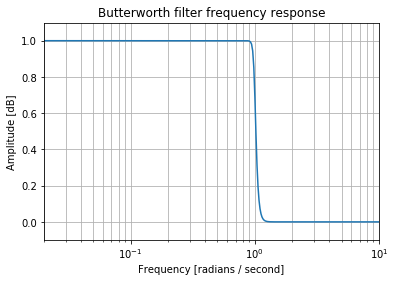

In [15]:
plt.plot(w, (abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

In [69]:
wo = (wp2+wp1)/2
bw = wp2-wp1

In [70]:
q,o =sp.signal.lp2lp(b, a, wo)

ValueError: x and y must have same first dimension, but have shapes (1,) and (28,)

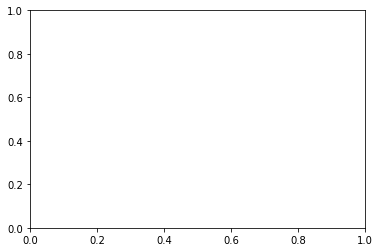

In [71]:
plt.plot(q, abs(o))
plt.xscale('log')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

# Filtro passa-faixa
## Filtro elíptico
b) Passa-altas (yb): em que apenas a frequência correspondente à a1 + a2 apareça na saída do filtro;

In [91]:
Ap = 0.5    #dB
Ar = 65     #dB
gp = -Ap
gr = -Ar
dr = 10**(gr/20)
dp = 1-10**(gp/20)

wr10 = 200*np.pi*(a1+a2)-150
wp10 = 200*np.pi*(a1+a2)-100
wp20 = 200*np.pi*(a1+a2)+100
wr20 = 200*np.pi*(a1+a2)+150

In [92]:
N1,Wn1 = sp.signal.ellipord([wr10,wr20],[wp10,wp20],Ap, Ar,analog = True) #funcao retorna a ordem do filtro de acordo com as freq 

z1,p1,k1 = sp.signal.ellipap(N1,Ap,Ar)

b1,a1 = sp.signal.zpk2tf(z1,p1,k1)

w1, h1 = sp.signal.freqs(b1, a1, np.linspace(0, 10, 500))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

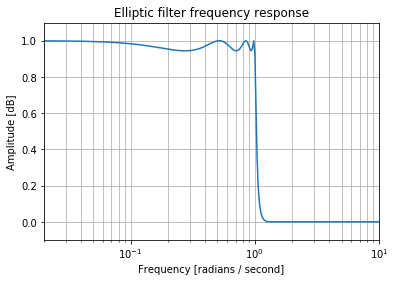

In [74]:
plt.plot(w1, (abs(h1)))
plt.xscale('log')
plt.title('Elliptic filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

In [75]:
wo1 = (wp1+wp2)/2
bw1 = wp2-wp1

In [76]:
q1,o1 = sp.signal.lp2bp(b1, a1, wo1,bw1)

ValueError: setting an array element with a sequence.

## Rejeita faixa

c) Rejeita-faixa (yc): em que a frequência correspondente à a2 seja filtrada e não apareça na saída do filtro.

In [77]:
Ap = 0.5    #dB
Ar = 65     #dB
gp = -Ap
gr = -Ar
dr = 10**(gr/20)
dp = 1-10**(gp/20)
wr100 = 200*np.pi*a2-100
wp100 = 200*np.pi*a2-200
wp200 = 200*np.pi*a2+200
wr200 = 200*np.pi*a2+100

In [78]:
print('wr100=', wr100)
print('wp100=', wp100)
print('wp200=', wp200)
print('wr200=', wr200)

wr100= 1784.9555921538758
wp100= 1684.9555921538758
wp200= 2084.955592153876
wr200= 1984.9555921538758


In [79]:
N3,[Wn3,Wn4] = sp.signal.cheb2ord([wr100,wr200],[wp100,wp200],Ap, Ar,analog = True) 

In [80]:
N3

8

In [81]:
z3,p3,k3 = sp.signal.cheb2ap(N3,Ar)

In [82]:
b3,a3 = sp.signal.zpk2tf(z3,p3,k3)

In [83]:
w3, h3 = sp.signal.freqs(b3, a3, np.linspace(0, 10, 500))

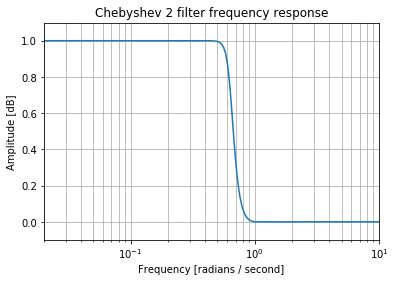

In [84]:
plt.plot(w3, abs(h3))
plt.xscale('log')
plt.title('Chebyshev 2 filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

In [85]:
wo3 = wr200-wr100
bw3 = (wp200+wp100)/2

q3,t3 = sp.signal.lp2bs(b3, a3, wo3,bw3)

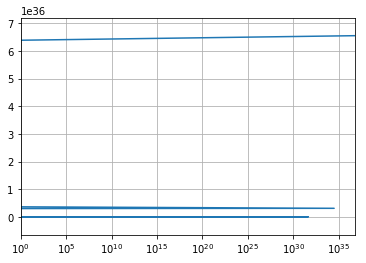

In [87]:
plt.plot(q3, abs(t3))
plt.xscale('log')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')